## G489/589 Advanced Geospatial Data Analysis in Python: In-class Assessment 2
**Indiana University  
Spring 2019  
Dr. Natasha MacBean**

### Part 1 (Question and Answer Section - 10 points)
Double click on each markdown box to write the answer.

1. What python library do we use for plotting maps with geographic coordinates? **[1 point]**

ANSWER: Cartopy

2. What string method do we use for separating strings, for example if we wanted to separate this string based on the underscore ("\_"): 'US-SRM_daily_2004-2018.csv'? **[1 point]**

ANSWER: str.split('_')

3. What does the keyword "hue" allow you to do in a seaborn scatterplot? **[1 point]**

ANSWER: to color-code different categories/groups of data using their category label in a pandas dataframe column that you feed into the hue keyword.

4. What matplotlib function can we use for plotting images? **[1 point]**

ANSWER: plt.imshow()

5. Write the netCDF4 library command you need to *open* a netcdf file before reading the data. **[1 point]**

ANSWER: netCDF4.Dataset(filename, 'r')

6. Write down the steps and GDAL functions you need to open an HDF file, find out the name of all the subdatasets, and then read in the data from a specific sub dataset contained in that HDF file. **[5 points]**

ANSWER:
1. import the library  
import gdal  

2. open the file  
hdf_ds = gdal.Open(hdf_filename)    

3. get all the sub datasets of the file  
hdf_subds = hdf_ds.GetSubDatasets()  

4. Now open a specific sub dataset into a new variable  
g = gdal.Open(sub_dataset_name)  

5. Use that variable to read the data as an array  
data = g.ReadAsArray()  



### Part 2 (Writing Code - 40 points)


For this part of the in-class assessment there are 5 points for detailing the logic (steps) of your code, 25 points for the actual script, 5 points for how well your code is commented, and 5 points for answering the final questions.

*In this exercise we'll be working again with the monthly global GPP data from 2007 to 2011 that are stored in the netcdf file "orch_gpp_monthly_2007-2011.nc". Remember the data have three dimensions (time, lat, lon).*

In Exercise 8, we looped over the first 12 months of the GPP dataset to plot the global GPP for each month.

In this exercise, you're going to loop over the first 12 months and **calculate the global total GPP** - i.e. the total across all latitudes and longitudes. [Hint: think how to use array indexing to select all the latitudes and longitudes]. This will result in one global total for each month.  
Within the loop you will **save the global total GPP for each month to a new array** (much like we saved the precipitation total for each site across Arizona).  
Next, you will **plot the global totals over those 12 months** using either a matplotlib plot or seaborn lineplot.  
Finally, you will save the plot.

**First, in the markdown box below write your logic in normal/plain english to explain the steps you will need to complete this exercise. Think of this as a plan for your script. [5 points out of 40]**

**LOGIC FOR YOUR CODE:**  
  
    
    


**Now in the code boxes below write the actual python script you need to complete this excercise. [25 points out of 40]** 

- Remember you that you need to also open the netcdf file and reads in the GPP data before you can loop over the 12 months.  

- Give any plots you create x- and y-axis labels and a title. And don't forget to close the plot.

- Do not forget to comment your code **[5 points out of 40]**! (I have given you a head start in the box below).

*NOTE! After you complete the coding task there are some questions to answer based on the plot you have created (see markdown box below).*

In [1]:
# - import libraries
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# - open GPP file
gpp_file = '/Users/nmacbean/TEACHING/IU/Fall2019/Fall2019_G489_589//data/gpp_sif/orch_gpp_monthly_2007-2011.nc' #'C:\\Users\\nmacbean\Downloads\\data\\orch_gpp_monthly_2007-2011.nc'
f=nc.Dataset(gpp_file,'r')

In [3]:
# - read in GPP data and close file
gpp_var = 'GPP'
gpp_data = f.variables[gpp_var][:]
f.close()

In [12]:
# - create new array to save global gpp per month
global_total_gpp = np.zeros(12)

# - loop over first 12 months and save the mean global GPP
for i in range(np.shape(gpp_data[:12,:,:])[0]):
    global_total_gpp[i] = np.ma.sum(gpp_data[i,:,:])  
print(global_total_gpp)

# - The idea for this task was to test your understanding of loops and indexing within loops
# - But NOTE! You don't actually need a loop to do this particular task - it can be done more simply, for example:
total_gpp = np.ma.sum(gpp_data, axis=(1,2))[:12]
print(total_gpp)

[0.12659404 0.12654751 0.13441735 0.16109173 0.21935107 0.28234444
 0.32781433 0.29919729 0.2343304  0.16703968 0.1293456  0.1229336 ]
[0.1265940380382007 0.12654750666435835 0.1344173466459293
 0.1610917254110398 0.21935107147093888 0.2823444385092964
 0.3278143298269148 0.29919728907775334 0.23433040238739372
 0.16703967885229426 0.12934560411081394 0.1229336024980918]


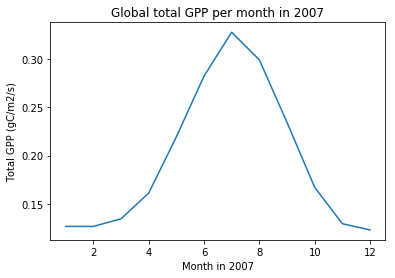

<Figure size 432x288 with 0 Axes>

In [13]:
# -
# - now plot the global mean GPP using matplotlib plot or seaborn lineplot
# -

# - create an array for the months
months = np.arange(1,13)

# - plot
plt.plot(months, global_total_gpp)

# - title and axes labels
plt.title('Global total GPP per month in 2007')
plt.xlabel('Month in 2007')
plt.ylabel('Total GPP (gC/m2/s)')

# - show and save
plt.show() 
plt.savefig('global_gpp_2007.png')

Once you have finished writing your code, answer the following questions based on what you see in your plot and what you have learned about GPP during our in-class exercises [5 points out of 40]**:

1. During which month(s) is GPP highest and lowest?

ANSWER: Highest in July, lowest November - March.

2. Approximately how long is the period of plant photosynthetic activity?

ANSWER: April to October, so 7 months.

3. Why do we see this seasonal pattern over the 12 months?

ANSWER: Because most of the temporal variability in GPP comes from the northern hemisphere in which plants are mostly deciduous and shed their leaves during the winter; therefore, there's no photosynthesis during this period and the GPP decreases to almost zero.

**When you have finished, upload your completed Jupyter Notebook and your saved plot to the Canvas Course page by 2:15pm**